# 作业背景
MovieLens数据集是一个广泛用来研究推荐系统算法的一个数据集。这个数据集包含了来自电影推荐网站多年积累的数据。我们将基于这个数据集练习数据的处理和分析。
从 grouplens 下载数据集 MovieLens 25M Dataset。 数据集包含6个文件：

tag.csv 用户给电影打的标签:
userId
movieId
tag
timestamp

rating.csv 用户给电影的评分:
userId
movieId
rating
timestamp

movie.csv 电影信息:
movieId
title
genres

link.csv 链接到其他资源的id:
movieId
imdbId
tmbdId

genome_scores.csv 电影和标签的相关性:
movieId
tagId
relevance

genome_tags.csv 包含标签的描述:
tagId
tag
# 需求
编写一个python程序读取此数据集的内容，并统计得到以下信息：

一共有多少不同的用户

一共有多少不同的电影

一共有多少不同的电影种类

一共有多少电影没有外部链接

2018年一共有多少人进行过电影评分

2018年评分5分以上的电影及其对应的标签

绘制电影复仇者联盟（The Avengers）每个月评分的平均值变化曲线图

# 提交方式
github工程源代码文件链接+结果截图

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

In [2]:
df_tags = pd.read_csv(r'file/tags.csv')
df_movies = pd.read_csv(r'file/movies.csv')
df_links = pd.read_csv(r'file/links.csv')
df_ratings = pd.read_csv(r'file/ratings.csv')

In [3]:
df_ratings.shape

(100836, 4)

In [4]:
df_tags.head(1),df_movies.head(1),df_links.head(1),df_ratings.head(1)

(   userId  movieId    tag   timestamp
 0       2    60756  funny  1445714994,
    movieId             title                                       genres
 0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy,
    movieId  imdbId  tmdbId
 0        1  114709   862.0,
    userId  movieId  rating  timestamp
 0       1        1     4.0  964982703)

In [5]:
df_all = pd.concat([df_tags,df_ratings])   #用于判断用户数和电影数
df_movies['genres'] = df_movies['genres'].map(lambda x:x.split('|'))
df_new = df_movies.explode('genres')  
len(list(df_new.groupby('genres').groups.keys()))
print('一共有%s个不同的用户；'%len(df_all.groupby('userId')))
print('一共有%s个不同的电影；'%len(df_all.groupby('movieId')))
print('一共有%s个不同的电影类型；'%len(list(df_new.groupby('genres').groups.keys())))
print('一共有%s个电影没有外部链接；'%len(df_links[np.isnan(df_links.tmdbId)]))   #isnan()只能用于判断数字类型是否为空
# 或者使用df_links[ df_links['tmdbId'].isna()== True]
print('2018年一共有%s人进行过电影评分。'%len(df_ratings.groupby('userId')))

一共有610个不同的用户；
一共有9742个不同的电影；
一共有20个不同的电影类型；
一共有8个电影没有外部链接；
2018年一共有610人进行过电影评分。


In [6]:
# 2018年一共有多少人进行过电影评分
df_movies_rating = pd.DataFrame( df_ratings.groupby('movieId').agg({'rating':'mean'}))
df_movies_rating_merge = pd.merge(df_movies,df_movies_rating,on = 'movieId',how = 'outer')
def ab(s_g):
    return','.join(s_g.values)
df_movies_tag = df_tags.groupby('movieId')['tag'].apply(ab)
df_movies_tag_merge = pd.merge(df_movies_tag,df_movies_rating_merge,on = 'movieId',how = 'outer')
df_movies_tag_merge[df_movies_tag_merge.rating == 5].reset_index()

,index,movieId,tag,title,genres,rating
0,765,3951,In Netflix queue,Two Family House (2000),[Drama],5.0
1,829,4454,"claymation,creativity,dystopia,free to downloa...",More (1998),"[Animation, Drama, Sci-Fi, IMAX]",5.0
2,834,4495,New York,Crossing Delancey (1988),"[Comedy, Romance]",5.0
3,883,5088,irreverent,"Going Places (Valseuses, Les) (1974)","[Comedy, Crime, Drama]",5.0
4,976,6201,England,Lady Jane (1986),"[Drama, Romance]",5.0
...,...,...,...,...,...,...
291,9619,176601,NaN,Black Mirror,[(no genres listed)],5.0
292,9641,179133,NaN,Loving Vincent (2017),"[Animation, Crime, Drama]",5.0
293,9642,179135,NaN,Blue Planet II (2017),[Documentary],5.0
294,9692,184245,NaN,De platte jungle (1978),[Documentary],5.0


In [7]:
import time
timeArray = time.localtime(964982703)   # localtime是 把从1970-1-1零点零分到当前时间系统所偏移的秒数时间转换为本地时间
otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S",timeArray)
otherStyleTime

'2000-07-31 02:45:03'

In [10]:
list(df_ratings_TheAvengers[df_ratings_TheAvengers.title.str.contains('Avengers')].groupby('title').groups.keys())

['Avengers, The (1998)',
 'Avengers, The (2012)',
 'Avengers: Age of Ultron (2015)',
 'Avengers: Infinity War - Part I (2018)',
 'Crippled Avengers (Can que) (Return of the 5 Deadly Venoms) (1981)',
 'Masked Avengers (1981)',
 'Ultimate Avengers (2006)',
 'Ultimate Avengers 2 (2006)']

In [33]:
def time_to_date(num):
    timeArray = time.localtime(num)
    otherStyleTime = time.strftime("%Y-%m",timeArray)
    return otherStyleTime
    
df_ratings['date'] = df_ratings.timestamp.apply(time_to_date)
df_movies_month_rating = df_ratings.groupby(['movieId','date']).agg({'rating':'mean'}).reset_index()
df_ratings_TheAvengers = pd.merge(df_movies_tag_merge,df_movies_month_rating,on = 'movieId')
df_ratings_TheAvengers = df_ratings_TheAvengers[df_ratings_TheAvengers.title == 'Avengers, The (2012)']
df_ratings_TheAvengers

,movieId,tag,title,genres,rating_x,date,rating_y
34925,89745,"Captain America,silly,superhero,superhero team...","Avengers, The (2012)","[Action, Adventure, Sci-Fi, IMAX]",3.869565,2012-05,4.500000
34926,89745,"Captain America,silly,superhero,superhero team...","Avengers, The (2012)","[Action, Adventure, Sci-Fi, IMAX]",3.869565,2012-06,5.000000
34927,89745,"Captain America,silly,superhero,superhero team...","Avengers, The (2012)","[Action, Adventure, Sci-Fi, IMAX]",3.869565,2012-07,4.500000
34928,89745,"Captain America,silly,superhero,superhero team...","Avengers, The (2012)","[Action, Adventure, Sci-Fi, IMAX]",3.869565,2012-08,3.500000
34929,89745,"Captain America,silly,superhero,superhero team...","Avengers, The (2012)","[Action, Adventure, Sci-Fi, IMAX]",3.869565,2012-09,5.000000
34930,89745,"Captain America,silly,superhero,superhero team...","Avengers, The (2012)","[Action, Adventure, Sci-Fi, IMAX]",3.869565,2012-10,4.500000
34931,89745,"Captain America,silly,superhero,superhero team...","Avengers, The (2012)","[Action, Adventure, Sci-Fi, IMAX]",3.869565,2012-11,3.250000
34932,89745,"Captain America,silly,superhero,superhero team...","Avengers, The (2012)","[Action, Adventure, Sci-Fi, IMAX]",3.869565,2012-12,4.000000
34933,89745,"Captain America,silly,superhero,superhero team...","Avengers, The (2012)","[Action, Adventure, Sci-Fi, IMAX]",3.869565,2013-05,3.500000
34934,89745,"Captain America,silly,superhero,superhero team...","Avengers, The (2012)","[Action, Adventure, Sci-Fi, IMAX]",3.869565,2013-12,5.000000


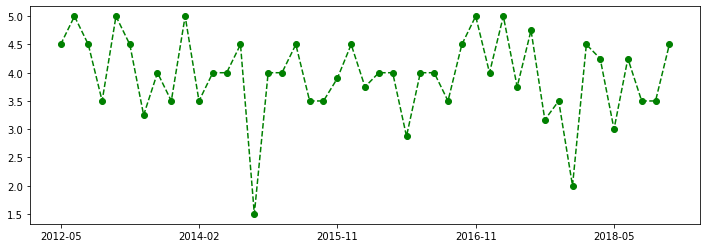

In [44]:
# 绘制电影复仇者联盟（Avengers, The (2012)）每个月评分的平均值变化曲线图
fig,ax = plt.subplots(figsize=(12, 4))
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.plot(df_ratings_TheAvengers['date'],df_ratings_TheAvengers['rating_y'],'--go')  #  go 即green cicle 绿色环形
